In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

/tmp/ipykernel_3627262/65408254.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def reset():
    os.remove('time.csv')
    os.remove('priority.csv')
    os.remove('avg.csv')
#reset()

In [3]:
time = pd.read_csv('time.csv', header=None)
time

FileNotFoundError: [Errno 2] No such file or directory: 'time.csv'

In [ ]:
avg = pd.read_csv('avg.csv', header=None)
avg

: 

In [ ]:
priority = pd.read_csv('priority.csv', header=None)
priority


: 

In [ ]:
priority = priority.to_numpy().flatten()
time = time.to_numpy().flatten()
avg = avg.to_numpy().flatten()

: 

In [ ]:
table = np.array([priority, time, avg]).T

: 

In [ ]:
table.T

: 

In [ ]:
table.T.shape

: 

In [ ]:
table = np.array([priority, time, avg]).T
pd.DataFrame(table, columns=['priority', 'time', 'avg'])

: 

In [ ]:
sorted = pd.DataFrame(table, columns=['priority', 'time', 'avg']).sort_values(by='priority')
sorted

: 

In [ ]:
from seaborn import kdeplot

: 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.bar( priority, avg,width=0.4, alpha=0.3)
ax2.bar(priority, time, alpha=0.3)


: 

In [ ]:
max(sorted['time'])

: 

In [ ]:
plt.plot(sorted['time'])

: 

In [ ]:
bins = np.histogram(sorted['priority'],4)
bins

: 

In [ ]:
classes = np.digitize(sorted['priority'], [-np.inf,1,2,4,5,np.inf])

: 

In [ ]:
np.unique(classes, return_counts=True)

: 

In [ ]:
sorted['class'] = classes
sorted

: 

In [ ]:
sorted.mean()

: 

In [ ]:
sorted.std()

: 

In [ ]:
mean = pd.DataFrame(sorted[sorted['class']==i].mean() for i in range(1,7))
mean

: 

In [ ]:
std = pd.DataFrame(sorted[sorted['class']==i].std() for i in range(1,6))
std

: 

In [ ]:
classes = [1,2,3,4,5,6]

: 

priority(all)   avg time   avg min space
</br>
3.0	  9989.375	  2.352072

In [ ]:
pd.read_csv('stat_data.csv')

: 

In [4]:
data = pd.read_csv('stat_data.csv')
data

,Unnamed: 0,n,time w/o p,time 0,time 1,time 2,time 3,time 4,space w/o p,space 0,space 1,space 2,space 3,space 4
0,0,4.0,3340.395000,3392.714286,3370.735849,3346.214545,3340.890909,3340.100000,10.331542,10.396095,10.346100,10.341947,10.284660,10.249126
1,1,8.0,3366.935000,3506.600000,3408.800000,3381.969925,3372.852174,3362.913043,8.974975,9.457338,9.150894,8.993418,8.728997,9.209418
2,2,12.0,3379.788333,3561.371429,3502.115385,3421.783375,3381.269461,3379.272727,8.190980,8.459640,8.514079,8.351714,8.258738,8.120889
3,3,16.0,3396.534375,3715.027027,3609.416667,3462.185778,3384.523585,3373.863636,7.660420,7.590805,7.915492,8.032219,7.976963,8.151358
4,4,20.0,3411.605500,3859.184211,3699.194656,3507.443001,3390.580645,3375.057143,7.316710,7.803957,7.868708,7.737265,7.824136,8.078064
5,5,24.0,3425.536250,3995.673077,3815.075710,3552.133252,3405.814590,3376.121212,7.099304,7.541319,7.569942,7.619761,7.512278,7.980814
6,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
from hyperparameters import delt

In [6]:
time_data = data.iloc[:,2:8]
time_data = time_data*delt

In [7]:
time_data

,time w/o p,time 0,time 1,time 2,time 3,time 4
0,33.403950,33.927143,33.707358,33.462145,33.408909,33.401000
1,33.669350,35.066000,34.088000,33.819699,33.728522,33.629130
2,33.797883,35.613714,35.021154,34.217834,33.812695,33.792727
3,33.965344,37.150270,36.094167,34.621858,33.845236,33.738636
4,34.116055,38.591842,36.991947,35.074430,33.905806,33.750571
5,34.255363,39.956731,38.150757,35.521333,34.058146,33.761212
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
time_percent = time_data.copy()
for i in range(5):
    time_percent[f'time {i}'] = (time_percent[f'time {i}'] - time_percent['time w/o p'])*100/time_percent['time w/o p']
time_percent

,time w/o p,time 0,time 1,time 2,time 3,time 4
0,33.403950,1.566260,0.908301,0.174217,0.014846,-0.008831
1,33.669350,4.148135,1.243416,0.446546,0.175744,-0.119455
2,33.797883,5.372617,3.619370,1.242535,0.043823,-0.015256
3,33.965344,9.376989,6.267632,1.932894,-0.353619,-0.667467
4,34.116055,13.119299,8.429731,2.809161,-0.616275,-1.071295
5,34.255363,16.643725,11.371634,3.695684,-0.575725,-1.442549
6,0.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
space_data = data.iloc[:,8:]
#space_data['n'] = data['n']
space_data

,space w/o p,space 0,space 1,space 2,space 3,space 4
0,10.331542,10.396095,10.346100,10.341947,10.284660,10.249126
1,8.974975,9.457338,9.150894,8.993418,8.728997,9.209418
2,8.190980,8.459640,8.514079,8.351714,8.258738,8.120889
3,7.660420,7.590805,7.915492,8.032219,7.976963,8.151358
4,7.316710,7.803957,7.868708,7.737265,7.824136,8.078064
5,7.099304,7.541319,7.569942,7.619761,7.512278,7.980814
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
space_percent = space_data.copy()
for i in range(5):
    space_percent[f'space {i}'] = (space_percent[f'space {i}'] - space_percent['space w/o p'])*100/space_percent['space w/o p']
space_percent

,space w/o p,space 0,space 1,space 2,space 3,space 4
0,10.331542,0.624823,0.140911,0.100717,-0.453767,-0.797707
1,8.974975,5.374538,1.960109,0.205497,-2.740706,2.612182
2,8.190980,3.279956,3.944575,1.962335,0.827238,-0.855701
3,7.660420,-0.908760,3.329739,4.853505,4.132183,6.408757
4,7.316710,6.659377,7.544344,5.747873,6.935163,10.405689
5,7.099304,6.226175,6.629346,7.331095,5.817096,12.416849
6,0.000000,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_3627262/3797576144.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_time = time_data.iloc[5][0]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: '/media/storage/Agam/pca/plots/comparison plots/time_bar.eps'

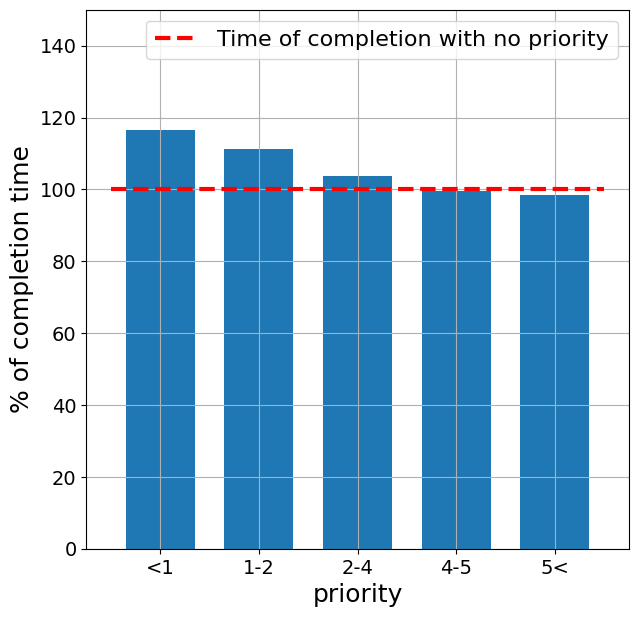

In [11]:
avg_time = time_data.iloc[5][0]
fig, ax = plt.subplots(figsize=(7,7))
plt.bar( ['<1','1-2','2-4','4-5','5<'],(time_data.iloc[5][1:8])*100/avg_time,width=0.7)
plt.xlabel('priority', fontsize=18)
plt.ylabel('% of completion time', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 150)
#plt.xlim(0,4)
plt.plot([-0.5,4.5],[avg_time*100/avg_time, avg_time*100/avg_time], linestyle='dashed', color='red', label='Time of completion with no priority', linewidth=3)
#plt.title('n = 24')
plt.legend(fontsize="16")
plt.grid()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/time_bar.eps', format='eps')

In [ ]:
#reset()

: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: '/media/storage/Agam/pca/plots/comparison plots/time_top_2.eps'

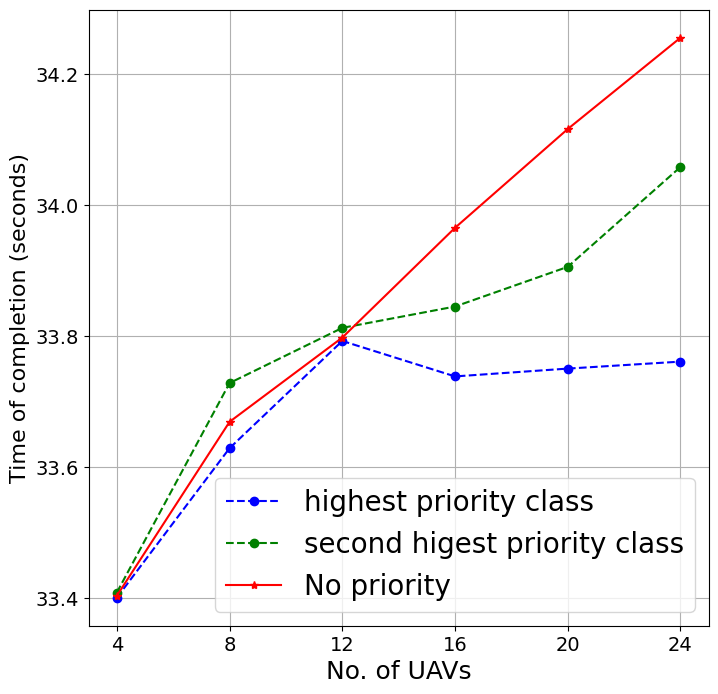

In [12]:
plt.figure(figsize=(8,8))


plt.plot([4,8,12,16,20,24],time_data['time 4'][:6], linestyle='--', marker='o', color='blue', label='highest priority class')
plt.plot([4,8,12,16,20,24],time_data['time 3'][:6], linestyle='--', marker='o', color='green', label='second higest priority class')
#plt.plot([4,8,12,16,20,24],time_data['time 2'][:6], linestyle='--', marker='o', color='pink', label='2 < p < 4')
#plt.plot([4,8,12,16,20,24],time_data['time 1'][:6], linestyle='--', marker='o', color='orange', label='1 < p < 2')
plt.plot([4,8,12,16,20,24],time_data['time w/o p'][:6], linestyle='-', marker='*', color='red', label='No priority')

plt.xticks([4,8,12,16,20,24], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize="20")
plt.xlabel('No. of UAVs', fontsize=18)
plt.ylabel('Time of completion (seconds)', fontsize=16)
plt.grid()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/time_top_2.eps', format='eps')


In [13]:
space_data

,space w/o p,space 0,space 1,space 2,space 3,space 4
0,10.331542,10.396095,10.346100,10.341947,10.284660,10.249126
1,8.974975,9.457338,9.150894,8.993418,8.728997,9.209418
2,8.190980,8.459640,8.514079,8.351714,8.258738,8.120889
3,7.660420,7.590805,7.915492,8.032219,7.976963,8.151358
4,7.316710,7.803957,7.868708,7.737265,7.824136,8.078064
5,7.099304,7.541319,7.569942,7.619761,7.512278,7.980814
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
space_data.iloc[5][2:]

space 1    7.569942
space 2    7.619761
space 3    7.512278
space 4    7.980814
Name: 5, dtype: float64

/tmp/ipykernel_3627262/4246262753.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_space = space_data.iloc[5][0]
/tmp/ipykernel_3627262/4246262753.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([-0.5,4.5],[space_data.iloc[5][0]*100/avg_space, space_data.iloc[5][0]*100/avg_space], linestyle='dashed', color='red', label='Mean Minimum Distance with no priority', linewidth=3)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: '/media/storage/Agam/pca/plots/comparison plots/space_bar.eps'

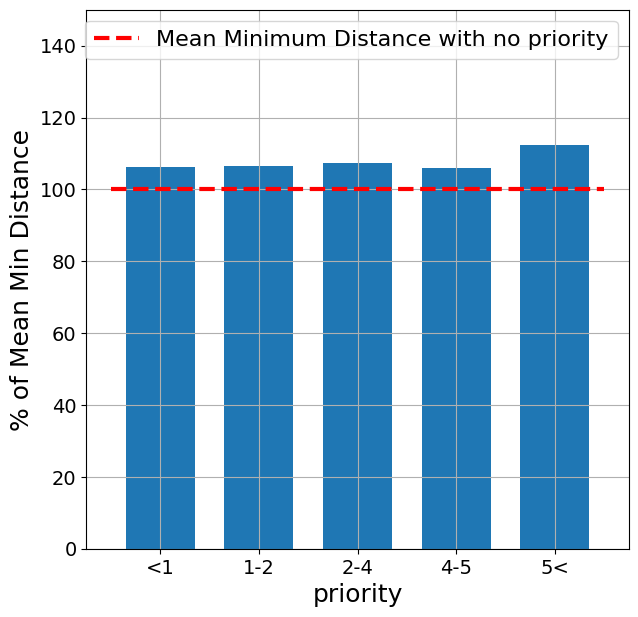

In [15]:
avg_space = space_data.iloc[5][0]
fig, ax = plt.subplots(figsize=(7,7))
plt.bar( ['<1','1-2','2-4','4-5','5<'],(space_data.iloc[5][1:]-0)*100/avg_space,width=0.7)
plt.xlabel('priority', fontsize=18)
plt.ylabel('% of Mean Min Distance', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,150)
plt.plot([-0.5,4.5],[space_data.iloc[5][0]*100/avg_space, space_data.iloc[5][0]*100/avg_space], linestyle='dashed', color='red', label='Mean Minimum Distance with no priority', linewidth=3)
plt.legend(fontsize="16")
plt.grid()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/space_bar.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: '/media/storage/Agam/pca/plots/comparison plots/space_top_2.eps'

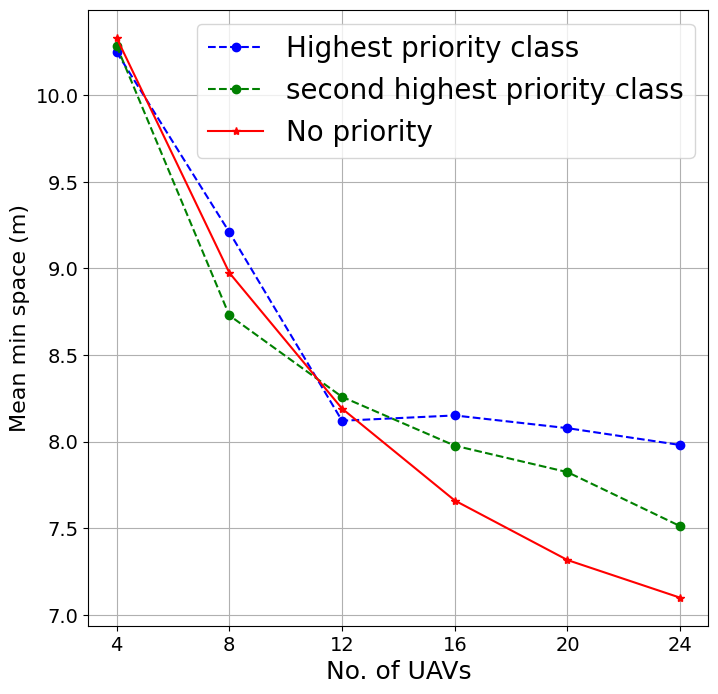

In [16]:
plt.figure(figsize=(8,8))


plt.plot([4,8,12,16,20,24],space_data['space 4'][:6], linestyle='--', marker='o', color='blue', label='Highest priority class')
plt.plot([4,8,12,16,20,24],space_data['space 3'][:6], linestyle='--', marker='o', color='green', label='second highest priority class')
#plt.plot([4,8,12,16,20,24],space_data['space 2'][:6], linestyle='--', marker='o', color='pink', label='2 < p < 4')
#plt.plot([4,8,12,16,20,24],space_data['space 1'][:6], linestyle='--', marker='o', color='orange', label='1 < p < 2')
plt.plot([4,8,12,16,20,24],space_data['space w/o p'][:6], linestyle='-', marker='*', color='red', label='No priority')

plt.xticks([4,8,12,16,20,24], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize="20")
plt.xlabel('No. of UAVs', fontsize=18)
plt.ylabel('Mean min space (m)', fontsize=16)
plt.grid()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/space_top_2.eps', format='eps')